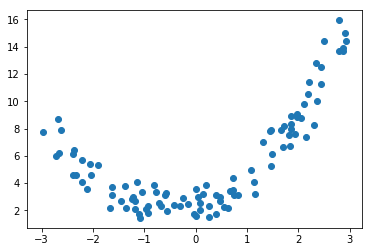

In [2]:
# 准备数据
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 + x**2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

In [4]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=500)

# Lasso回归
正则化项使用的是L1范数

In [13]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [11]:
# 使用Pipeline封装一个Lasso回归方法
def LassoRegression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('lasso_reg',Lasso(alpha=alpha))
    ])

1.087766788925177


D:\tool\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


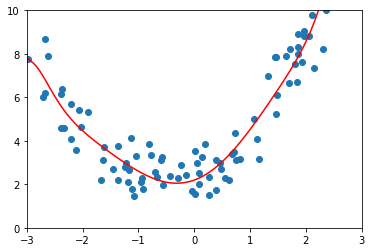

1.0266168791109083


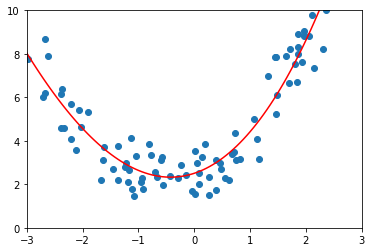

15.660108251851895


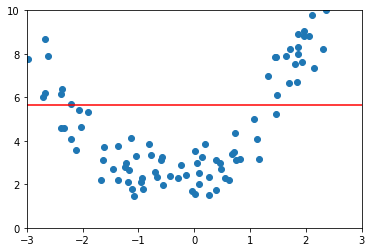

In [19]:
# 我们调整alpha=0.0001，0.1，10 看不同结果
alphas=[0.0001,0.1,10]
for alpha in alphas:
    lasso_reg = LassoRegression(30,alpha)
    lasso_reg.fit(X_train,y_train)
    y1_predict=lasso_reg.predict(X_test)
    print(mean_squared_error(y_test,y1_predict)) 
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = lasso_reg.predict(X_plot)
    plt.scatter(X,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,10])
    plt.show()

从上图可以看出，增加正则化会改善模型的拟合效果；不过，α值必须适中，过大过小效果都不佳。

# 岭回归
正则化项使用的是L2范数

In [20]:
from sklearn.linear_model import Ridge

In [21]:
# 使用Pipeline封装一个Lasso回归方法
def ridgeregression(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('ridge_reg',Ridge(alpha=alpha))
    ])

1.297048277934785


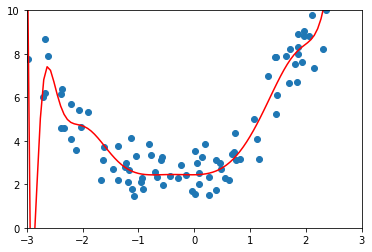

0.9813966540448721


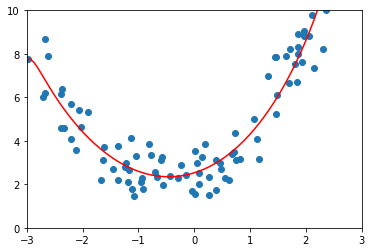

8.534809583295251


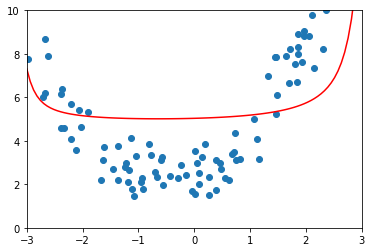

In [23]:
# 我们调整alpha=0.0001，1，1000 看不同结果
alphas=[0.0001,1,1000]
for alpha in alphas:
    ridge_reg = ridgeregression(30,alpha)
    ridge_reg.fit(X_train,y_train)
    y1_predict=ridge_reg.predict(X_test)
    print(mean_squared_error(y_test,y1_predict)) 
    X_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = ridge_reg.predict(X_plot)
    plt.scatter(X,y)
    plt.plot(X_plot[:,0],y_plot,color='r')
    plt.axis([-3,3,0,10])
    plt.show()

从上图可以看出，跟LASSO回归一样，α值必须适中，过大过小效果都不佳。